In [3]:
import scipy.io
import requests
from PIL import Image, PngImagePlugin, JpegImagePlugin
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from io import BytesIO
import datasets 
from datasets import load_dataset
import re
import os
from collections import Counter
import pickle
import json

def load_image(image_file):
    if isinstance(image_file, str) and (image_file.startswith('http://') or image_file.startswith('https://')):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    elif isinstance(image_file, (JpegImagePlugin.JpegImageFile, PngImagePlugin.PngImageFile)):
        image = image_file.convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    return image

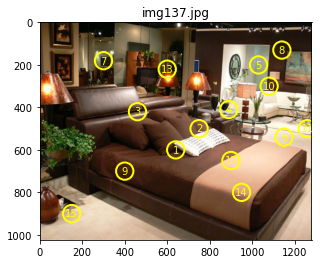

In [10]:

output1 = 'Here’s a structured sequence of 15 fixations that a typical observer might make while viewing this scene, considering human visual attention tendencies:\n\n### **Fixation Sequence:**\n\n1. **Coordinates: (900, 220)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The laptop on the couch is a recognizable object and likely to draw initial attention due to its defined shape and association with work or entertainment.\n\n2. **Coordinates: (640, 320)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The red soda bottle contrasts strongly against the wooden table and surrounding objects, making it visually salient.\n\n3. **Coordinates: (480, 280)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The green plant in the center acts as a prominent natural element, drawing fixation due to its color and distinct texture variety.\n\n4. **Coordinates: (720, 360)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The remote controls placed together are common everyday items, attracting attention due to familiarity and function.\n\n5. **Coordinates: (540, 500)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The hammer, an uncommon object on a coffee table, raises curiosity about why it is there.\n\n6. **Coordinates: (850, 450)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The open magazine and image of a person with a landscape scene create an area of visual interest and narrative intrigue.\n\n7. **Coordinates: (380, 620)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The pair of scissors with open blades naturally attract attention due to their shape and potential as a sharp object.\n\n8. **Coordinates: (730, 400)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The small jar with an unknown substance next to the soda bottle creates curiosity, leading to a closer look.\n\n9. **Coordinates: (220, 540)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The blue cloth positioned on top of a book or papers creates a contrast of textures and colors, drawing attention.\n\n10. **Coordinates: (920, 570)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The yellow sticky note with markings stands out against the darker wood table, triggering curiosity about written text.\n\n11. **Coordinates: (650, 550)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The white candles on the table may attract attention due to their symmetrical arrangement and association with calm or aesthetic appeal.\n\n12. **Coordinates: (480, 680)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The beige knitted glove positioned near the scissors adds texture contrast and an element of intrigue.\n\n13. **Coordinates: (120, 460)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The lottery or bingo card in the foreground with marked numbers could draw a fixation due to its structured pattern.\n\n14. **Coordinates: (800, 250)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The stack of books near the remote controls provides an area of interest due to the textual content and stacking arrangement.\n\n15. **Coordinates: (320, 720)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The white container with a lid at the edge of the table has a unique shape and stands out against the cluttered background.\n\nThis sequence simulates how a typical observer might visually explore the scene, prioritizing importance based on contrast, familiarity, potential functionality, and narrative intrigue.'
output2 = "### **Fixation Sequence with Justifications**\n\n1. **Coordinates:** (650, 420)  \n   **Fixation Duration:** Long  \n   **Justification:** The waiter in the scene is performing an action, which naturally attracts attention as a point of interest.\n\n2. **Coordinates:** (800, 670)  \n   **Fixation Duration:** Medium  \n   **Justification:** The food on the table serves as another focal point, as people tend to look at food and dining elements in a scene.\n\n3. **Coordinates:** (1050, 440)  \n   **Fixation Duration:** Short  \n   **Justification:** The fireplace is warm and visually striking, naturally drawing a viewer's eyes.\n\n4. **Coordinates:** (400, 300)  \n   **Fixation Duration:** Short  \n   **Justification:** The large ornate mirror reflects part of the room and has an intricate frame, making it eye-catching.\n\n5. **Coordinates:** (250, 280)  \n   **Fixation Duration:** Medium  \n   **Justification:** The illuminated lamp beside the mirror contrasts with the surroundings, attracting attention.\n\n6. **Coordinates:** (1100, 500)  \n   **Fixation Duration:** Medium  \n   **Justification:** The wine bottles and glasses on the cabinet are distinct elements, capturing interest.\n\n7. **Coordinates:** (980, 620)  \n   **Fixation Duration:** Short  \n   **Justification:** The rich texture of the couch and its positioning make it an evident part of the composition.\n\n8. **Coordinates:** (560, 750)  \n   **Fixation Duration:** Medium  \n   **Justification:** The back of the wooden chair in the foreground creates a sense of depth, drawing brief attention.\n\n9. **Coordinates:** (300, 580)  \n   **Fixation Duration:** Short  \n   **Justification:** The cream-colored chair near the table stands out due to its elegant design and placement.\n\n10. **Coordinates:** (200, 390)  \n   **Fixation Duration:** Short  \n   **Justification:** The buffet table setup with silver serving dishes suggests an event or gathering, bringing momentary curiosity.\n\n11. **Coordinates:** (1150, 300)  \n   **Fixation Duration:** Short  \n   **Justification:** The decorative elements on the shelf by the window add uniqueness to this area, briefly pulling the gaze.\n\n12. **Coordinates:** (620, 500)  \n   **Fixation Duration:** Short  \n   **Justification:** The waiter's hands and action of placing food add movement, catching attention again.\n\n13. **Coordinates:** (900, 220)  \n   **Fixation Duration:** Short  \n   **Justification:** The window drapery and scenic outdoor greenery provide a contrast from the interior.\n\n14. **Coordinates:** (800, 280)  \n   **Fixation Duration:** Short  \n   **Justification:** The other small window adds lighting and depth to the setting, momentarily attracting interest.\n\n15. **Coordinates:** (1050, 360)  \n   **Fixation Duration:** Medium  \n   **Justification:** Returning to the fireplace as a final fixation point, as it remains a visually warm and comforting feature of the scene.\n\nThis step-by-step sequence captures a natural gaze pattern, prioritizing human activities, prominent objects, sources of light, and rich textures."
output3 = "### Fixation Sequence for Natural Viewing:\n\n1. **Coordinates**: (320, 200)  \n   **Fixation Duration**: 500ms  \n   **Justification**: The great white shark's face is visually dominant and a high-contrast feature in the scene.  \n\n2. **Coordinates**: (700, 150)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The orca has a contrasting black-and-white coloration that draws attention.  \n\n3. **Coordinates**: (500, 180)  \n   **Fixation Duration**: 450ms  \n   **Justification**: The beluga whale’s eyes and mouth create a facial-like focal point.  \n\n4. **Coordinates**: (900, 190)  \n   **Fixation Duration**: 500ms  \n   **Justification**: Another great white shark at a high position in the image captures attention due to symmetry and size.  \n\n5. **Coordinates**: (600, 400)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The jellyfish in the middle has a bright cyan body contrasting strongly against the darker background.  \n\n6. **Coordinates**: (850, 420)  \n   **Fixation Duration**: 450ms  \n   **Justification**: The sea turtle above the long, silver fish directs attention due to its unique shape and posture.  \n\n7. **Coordinates**: (1020, 580)  \n   **Fixation Duration**: 500ms  \n   **Justification**: The otter at the right side has a realistic expression and detailed facial features pulling human gaze.  \n\n8. **Coordinates**: (550, 230)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The dolphin has a playful posture and is located at a visually salient depth.  \n\n9. **Coordinates**: (400, 720)  \n   **Fixation Duration**: 450ms  \n   **Justification**: Clownfish in the foreground stand out due to their bright orange coloring and strong contrast.  \n\n10. **Coordinates**: (870, 750)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The yellow-and-black striped fish have high color contrast and appear grouped, creating visual interest.  \n\n11. **Coordinates**: (450, 540)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The mix of vibrant red, blue, and yellow fish creates a visually complex region that attracts attention.  \n\n12. **Coordinates**: (300, 650)  \n   **Fixation Duration**: 450ms  \n   **Justification**: Another cluster of clownfish reinforces recognition and interest due to repetition.  \n\n13. **Coordinates**: (680, 630)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The second large jellyfish contrasts in color and form, providing another anchor in the composition.  \n\n14. **Coordinates**: (980, 520)  \n   **Fixation Duration**: 450ms  \n   **Justification**: The large, elongated fish's texture and positioning create intrigue.  \n\n15. **Coordinates**: (720, 850)  \n   **Fixation Duration**: 400ms  \n   **Justification**: The dense and colorful fish grouping at the bottom keeps the viewer engaged in details at the end of the sequence.  \n\nThis fixation sequence follows natural gaze attraction principles such as high contrast, unique textures, animal faces, and motion cues."
coors, centerpoints = [], []


# for line in output3.split('\n'):
#     res = re.findall("\d{3,4}\W+\d{3,4}",line)
#     if len(res) == 0:
#         continue
#     if len(res) > 1:
#         print('bad response, re-generate')
#         break
#     coor_raw_text = res[0]
#     res = re.findall("\d+",coor_raw_text)
#     if len(res) != 2:
#         print('bad response, re-generate')
#         break
#     x,y = [int(_) for _ in res]
#     coors.append([x,y])
# if len(coors) != 15:
#     assert False, "bad response"
coors = [[600, 200], [850, 180], [1000, 250], [500, 450], [750, 550], [1100, 650], [950, 500], [300, 600], [500, 700], [850, 750], [650, 850], [200, 500], [1000, 320], [750, 180], [600, 950]]
coors = [[750, 320], [820, 330], [1030, 160], [980, 460], [630, 700], [950, 690], [380, 520], [460, 600], [200, 340], [150, 750], [1080, 570], [1020, 850], [230, 220], [1170, 100], [910, 310]]
coors = [[640, 600], [750, 500], [460, 420], [890, 410], [1030, 200], [1150, 540], [300, 180], [1140, 130], [400, 700], [1080, 300], [1260, 500], [900, 650], [600, 220], [950, 800], [150, 900]]
W,H = (1280, 1024)
pixel_coor_scanpaths = []
Xs, Ys =[],[]
fig, ax = plt.subplots()
for i,(x,y) in enumerate(coors):
    # print(x,y,'->', int((x+1)*W/2), int((y+1)*H/2))
    pixel_x, pixel_y = int(x), int(y)
    pixel_coor_scanpaths.append([pixel_x, pixel_y])
    Xs.append(pixel_x)
    Ys.append(pixel_y)
    plt.text(float(pixel_x), float(pixel_y), str(i+1),horizontalalignment='center',verticalalignment='center',color='yellow',size=10)
    

image_path = "/home/liuxiao/AttentionPredictionDatasets/datasets/naturaldesign/stimuli/img137.jpg"
image = load_image(image_path) 
# image = Image.open(root)
# image.show()


# plt.axis('off')
plt.title('img137.jpg')
plt.scatter(Xs, Ys, s=300, facecolors='none', edgecolors='yellow',lw=2)
plt.imshow(image)
plt.show()    

In [3]:
with open('/home/liuxiao/TuringGithub/XiaoData/all_results/chatgpt_free_viewing.pkl','rb') as f:
    results = pickle.load(f)

In [22]:
def parseCoordinates(output):
    coors = []
    for line in output.split('\n'):
        res = re.findall("[(\[\{]\d{1,4}\W+\d{1,4}[)\]\}]",line)
        if len(res) == 0:
            continue
        if len(res) > 1:
            print('bad response, re-generate',line,res)
            break
        coor_raw_text = res[0]
        res = re.findall("\d+",coor_raw_text)
        if len(res) != 2:
            print('bad response, re-generate',coor_raw_text)
            break
        x,y = [int(_) for _ in res]
        coors.append([x,y])
    if len(coors) != 15:
        assert False, "bad response: {}\n\n{} coordinates found: {}".format(output,len(coors),coors)
    return coors
parsed_results = {}
for k,v in results.items():
    parsedres = parseCoordinates(v)
    print(k,parsedres)
    parsed_results[k] = parsedres
with open('/home/liuxiao/TuringGithub/XiaoData/all_results/chatgpt_free_viewing_parsed.json','w') as f:
    json.dump(parsed_results,f)

img013.jpg [[600, 200], [850, 180], [1000, 250], [500, 450], [750, 550], [1100, 650], [950, 500], [300, 600], [500, 700], [850, 750], [650, 850], [200, 500], [1000, 320], [750, 180], [600, 950]]
img238.jpg [[960, 320], [1060, 400], [780, 680], [1180, 500], [350, 500], [300, 400], [300, 200], [1000, 200], [1100, 150], [200, 800], [100, 680], [850, 320], [1250, 300], [400, 300], [500, 600]]
img079.jpg [[640, 700], [500, 800], [850, 750], [250, 750], [700, 500], [1050, 600], [620, 450], [380, 400], [900, 300], [1050, 900], [750, 650], [300, 950], [1000, 500], [670, 350], [600, 250]]
img167.jpg [[700, 600], [580, 200], [300, 150], [400, 250], [620, 320], [900, 480], [1100, 400], [1150, 800], [250, 750], [100, 900], [750, 160], [950, 280], [500, 650], [820, 570], [650, 1000]]
img036.jpg [[960, 120], [860, 250], [940, 400], [650, 500], [360, 250], [280, 500], [220, 380], [1100, 650], [980, 750], [780, 720], [500, 160], [100, 140], [1200, 180], [1160, 840], [600, 620]]
img108.jpg [[640, 400],